# Problem 3.29

The problem wants a table containing multiplicity, number of energy particles, entropy, temperature and heat capacity per particle, first for 50 particles and 100 energy packets, then for 5000 particles and 100 energy packets. Then it wants us to up the number of particles to 5000. And do some comparisons. So this is a starter for how to do that.

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sp
import math as math

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
def factorial(x):
    return sp.factorial(x, exact=True)

def multiplicity(N,q):
    return factorial(q+N-1)//factorial(q)//factorial(N-1)

def logArray(array):
    import math as math
    return [math.log(x) for x in array]

In [5]:
def multiTable(N_a, q):
    df = pd.DataFrame({'q_A':range(0, q+1, 1)})#,'q_B':range(q, 0-1,-1)})
    df['multi_A'] = [multiplicity(N_a, i) for i in df['q_A']]
    # df['multi_B'] = [multiplicity(N_b, i) for i in df['q_B']]
    # df['multi_total'] = df['multi_A']*df['multi_B']
    # df['probability'] = df['multi_total']/df['multi_total'].sum()
    df['S'] = logArray(df['multi_A'])
    df['T'] = 1/np.gradient(df['S'])
    df['C'] = 1/np.gradient(df['T'])/N_a
    return df

In [9]:
tb = multiTable(5000, 100)

Text(0.5, 0, 'Energy')

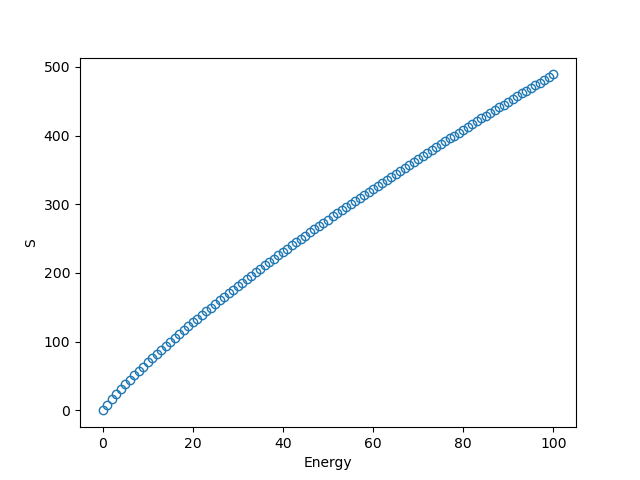

In [10]:
fig0, ax0 = plt.subplots()

ax0.plot(tb['q_A'], tb['S'], 'o', mfc='None')
ax0.set_ylabel('S')
ax0.set_xlabel('Energy')

Text(0, 0.5, 'Heat Capacity')

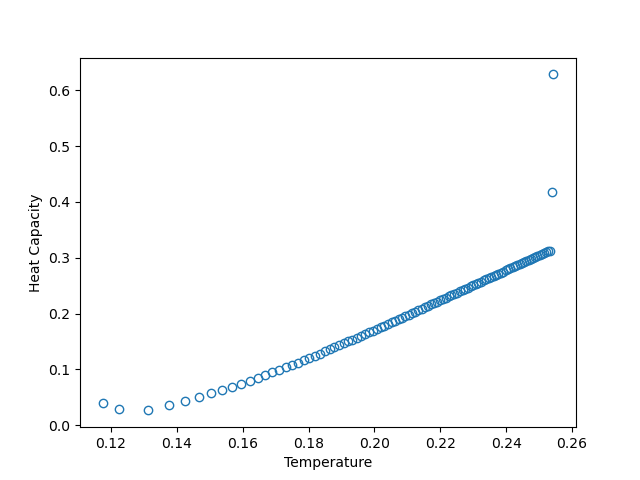

In [11]:
fig1, ax1 = plt.subplots()

ax1.plot(tb['T'], tb['C'], 'o', mfc = 'None')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Heat Capacity')